In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_csv('train.csv')

In [3]:
test=pd.read_csv('test.csv')


In [4]:
train.head()

Severity  Safety_Score  \
0                Minor_Damage_And_Injuries     49.223744   
1                Minor_Damage_And_Injuries     62.465753   
2        Significant_Damage_And_Fatalities     63.059361   
3  Significant_Damage_And_Serious_Injuries     48.082192   
4        Significant_Damage_And_Fatalities     26.484018   

   Days_Since_Inspection  Total_Safety_Complaints  Control_Metric  \
0                     14                       22       71.285324   
1                     10                       27       72.288058   
2                     13                       16       66.362808   
3                     11                        9       74.703737   
4                     13                       25       47.948952   

   Turbulence_In_gforces  Cabin_Temperature  Accident_Type_Code  \
0               0.272118              78.04                   2   
1               0.423939              84.54                   2   
2               0.322604              78.86                   7   
3               0.337029              81.79                   3   
4               0.541140              77.16                   3   

   Max_Elevation  Violations  Adverse_Weather_Metric  Accident_ID  
0   31335.476824           3                0.424352         7570  
1   26024.711057           2                0.352350        12128  
2   39269.053927           3                0.003364         2181  
3   42771.499200           1                0.211728         5946  
4   35509.228515           2                0.176883         9054

In [5]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

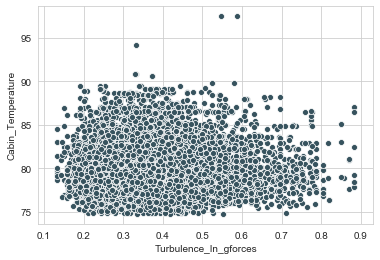

In [6]:
sns.scatterplot('Turbulence_In_gforces','Cabin_Temperature',data=train)

In [7]:
train1=train.copy()

In [8]:
train1.head()

Severity  Safety_Score  \
0                Minor_Damage_And_Injuries     49.223744   
1                Minor_Damage_And_Injuries     62.465753   
2        Significant_Damage_And_Fatalities     63.059361   
3  Significant_Damage_And_Serious_Injuries     48.082192   
4        Significant_Damage_And_Fatalities     26.484018   

   Days_Since_Inspection  Total_Safety_Complaints  Control_Metric  \
0                     14                       22       71.285324   
1                     10                       27       72.288058   
2                     13                       16       66.362808   
3                     11                        9       74.703737   
4                     13                       25       47.948952   

   Turbulence_In_gforces  Cabin_Temperature  Accident_Type_Code  \
0               0.272118              78.04                   2   
1               0.423939              84.54                   2   
2               0.322604              78.86                   7   
3               0.337029              81.79                   3   
4               0.541140              77.16                   3   

   Max_Elevation  Violations  Adverse_Weather_Metric  Accident_ID  
0   31335.476824           3                0.424352         7570  
1   26024.711057           2                0.352350        12128  
2   39269.053927           3                0.003364         2181  
3   42771.499200           1                0.211728         5946  
4   35509.228515           2                0.176883         9054

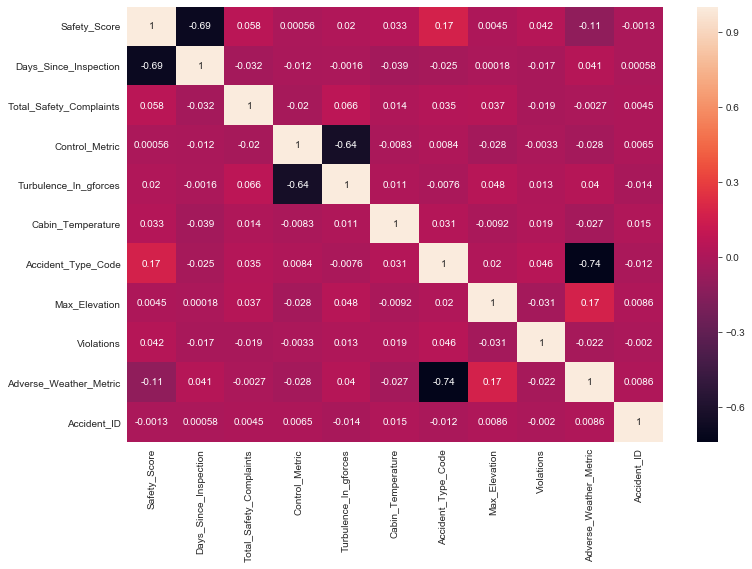

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(train1.corr(),annot=True)

In [10]:
X=train.drop(['Severity','Accident_ID'],axis=1)
y=train['Severity']

In [11]:
from sklearn.ensemble import ExtraTreesClassifier

In [12]:
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, y)
print(model.feature_importances_)

[0.22747352 0.15084856 0.05145167 0.14746931 0.07545694 0.05608807
 0.12201084 0.05038976 0.03473923 0.0840721 ]


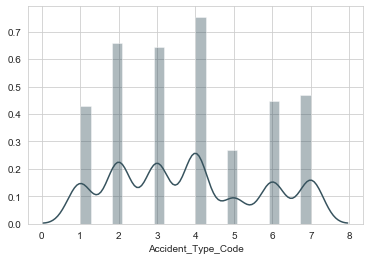

In [13]:
sns.distplot(train['Accident_Type_Code'],hist=True)


In [14]:
def detect_outlier(data,col):
    q1, q3= np.percentile(data[col],[25,75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return lower_bound,upper_bound
    

In [15]:
def detect_outlier_map(data,col):
    q1, q3= np.percentile(data[col],[25,75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    s1=data[data[col]<lower_bound]
    s2=data[data[col]>upper_bound]
    g1=data.groupby("Accident_Type_Code").mean()
    
    
    maping={1:g1[col][1],2:g1[col][2],3:g1[col][3],4:g1[col][4],5:g1[col][5],6:g1[col][6],7:g1[col][7]}
    for dat in [s1]:
        dat[col]=dat['Accident_Type_Code'].map(maping)
    for dat in [s2]:
        dat[col]=dat['Accident_Type_Code'].map(maping)
    data.update(s1)
    data.update(s2)
    print('Lower bound:',lower_bound)
    print('Upper Bound:',upper_bound)
    print('Dataframe Succesfully updated')

In [16]:
train.head()

Severity  Safety_Score  \
0                Minor_Damage_And_Injuries     49.223744   
1                Minor_Damage_And_Injuries     62.465753   
2        Significant_Damage_And_Fatalities     63.059361   
3  Significant_Damage_And_Serious_Injuries     48.082192   
4        Significant_Damage_And_Fatalities     26.484018   

   Days_Since_Inspection  Total_Safety_Complaints  Control_Metric  \
0                     14                       22       71.285324   
1                     10                       27       72.288058   
2                     13                       16       66.362808   
3                     11                        9       74.703737   
4                     13                       25       47.948952   

   Turbulence_In_gforces  Cabin_Temperature  Accident_Type_Code  \
0               0.272118              78.04                   2   
1               0.423939              84.54                   2   
2               0.322604              78.86                   7   
3               0.337029              81.79                   3   
4               0.541140              77.16                   3   

   Max_Elevation  Violations  Adverse_Weather_Metric  Accident_ID  
0   31335.476824           3                0.424352         7570  
1   26024.711057           2                0.352350        12128  
2   39269.053927           3                0.003364         2181  
3   42771.499200           1                0.211728         5946  
4   35509.228515           2                0.176883         9054

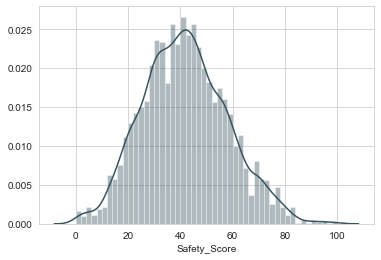

In [17]:
sns.distplot(train['Safety_Score'])

In [18]:
detect_outlier_map(train,'Safety_Score')

Lower bound: -2.283105022830881
Upper Bound: 85.38812785388109
Dataframe Succesfully updated


C:\Users\SHAKYA\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


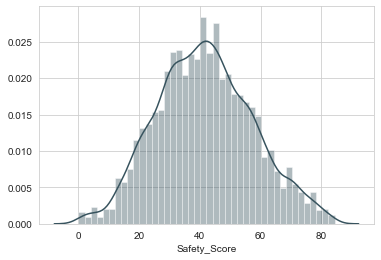

In [19]:
sns.distplot(train['Safety_Score'])

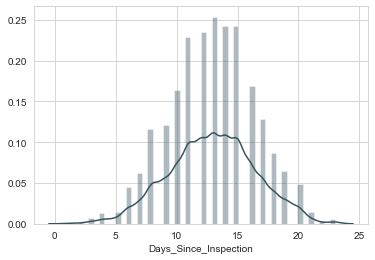

In [20]:
sns.distplot(train['Days_Since_Inspection'])

In [21]:
detect_outlier(train,'Days_Since_Inspection')

(5.0, 21.0)

In [22]:
detect_outlier_map(train,'Days_Since_Inspection')

Lower bound: 5.0
Upper Bound: 21.0
Dataframe Succesfully updated


C:\Users\SHAKYA\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\SHAKYA\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


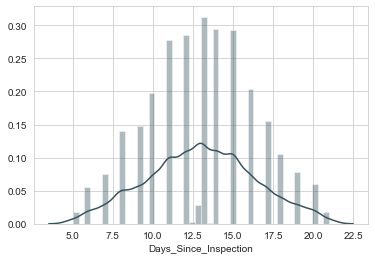

In [23]:
sns.distplot(train['Days_Since_Inspection'])

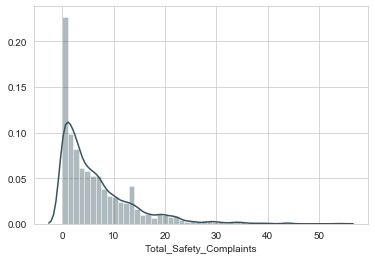

In [24]:
sns.distplot((train['Total_Safety_Complaints']))

In [25]:
detect_outlier(train,'Total_Safety_Complaints')

(-8.5, 19.5)

In [26]:
detect_outlier_map(train,'Total_Safety_Complaints')

Lower bound: -8.5
Upper Bound: 19.5
Dataframe Succesfully updated


C:\Users\SHAKYA\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


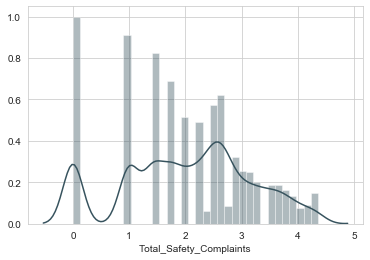

In [27]:
sns.distplot(np.power(train['Total_Safety_Complaints'],0.5))

In [28]:
train.Total_Safety_Complaints=np.power(train['Total_Safety_Complaints'],0.5)

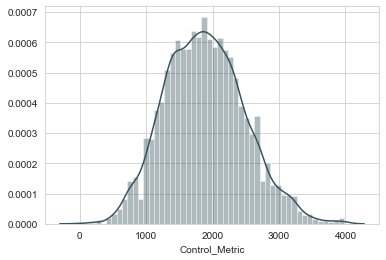

In [29]:
sns.distplot(np.power(train['Control_Metric'],1.8))

In [30]:
detect_outlier(train,'Control_Metric')

(32.31540565177775, 97.94895168641733)

In [31]:
detect_outlier_map(train,'Control_Metric')

Lower bound: 32.31540565177775
Upper Bound: 97.94895168641733
Dataframe Succesfully updated


C:\Users\SHAKYA\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\SHAKYA\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [32]:
train.Control_Metric=np.power(train['Control_Metric'],1.8)

In [33]:
train.columns

Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

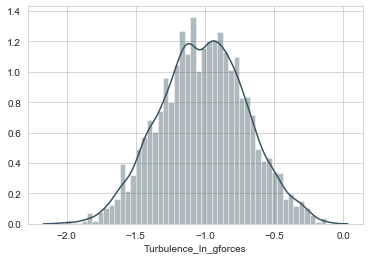

In [34]:
sns.distplot(np.log(train['Turbulence_In_gforces']))

In [35]:
detect_outlier(train,'Turbulence_In_gforces')

(0.05714280562567631, 0.6878676523620629)

In [36]:
detect_outlier_map(train,'Turbulence_In_gforces')

Lower bound: 0.05714280562567631
Upper Bound: 0.6878676523620629
Dataframe Succesfully updated


C:\Users\SHAKYA\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


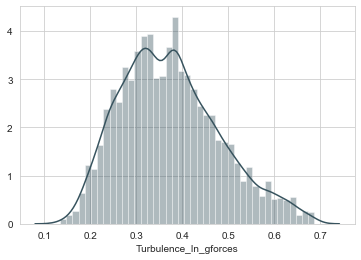

In [37]:
sns.distplot(train['Turbulence_In_gforces'])

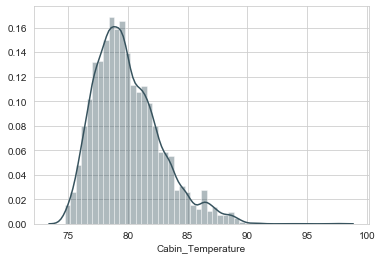

In [38]:
sns.distplot(train['Cabin_Temperature'])

In [39]:
detect_outlier(train,'Cabin_Temperature')

(72.55999999999997, 86.96000000000001)

In [40]:
detect_outlier_map(train,'Cabin_Temperature')

Lower bound: 72.55999999999997
Upper Bound: 86.96000000000001
Dataframe Succesfully updated


C:\Users\SHAKYA\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


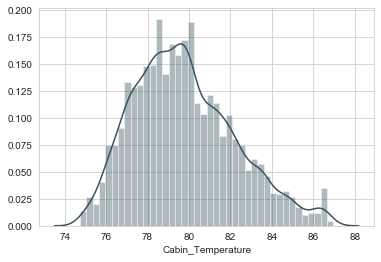

In [41]:
sns.distplot(train['Cabin_Temperature'])

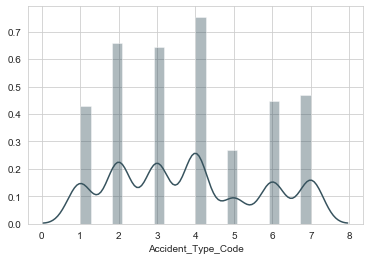

In [42]:
sns.distplot(train['Accident_Type_Code'])

In [43]:
detect_outlier(train,'Accident_Type_Code')
#No outlier present in this Column

(-2.5, 9.5)

In [44]:
train.columns

Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

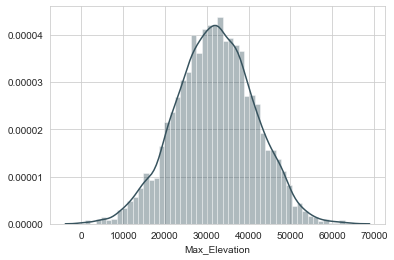

In [45]:
sns.distplot(train['Max_Elevation'])

In [46]:
detect_outlier(train,'Max_Elevation')

(6823.13000087094, 57315.148420441954)

In [47]:
detect_outlier_map(train,'Max_Elevation')

Lower bound: 6823.13000087094
Upper Bound: 57315.148420441954
Dataframe Succesfully updated


C:\Users\SHAKYA\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\SHAKYA\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


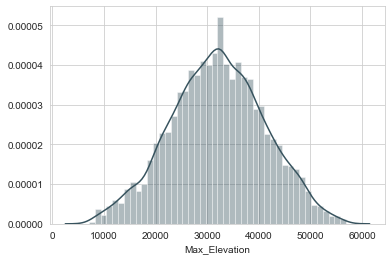

In [48]:
sns.distplot(train['Max_Elevation'])

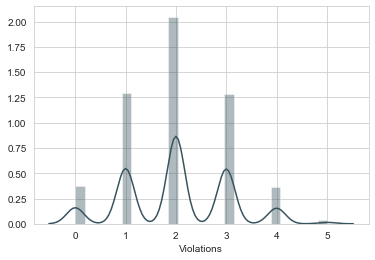

In [49]:
sns.distplot(train['Violations'])

In [50]:
detect_outlier(train,'Violations')

(-2.0, 6.0)

In [51]:
train[train['Violations']>6]
#No outlier in this column

Empty DataFrame
Columns: [Severity, Safety_Score, Days_Since_Inspection, Total_Safety_Complaints, Control_Metric, Turbulence_In_gforces, Cabin_Temperature, Accident_Type_Code, Max_Elevation, Violations, Adverse_Weather_Metric, Accident_ID]
Index: []

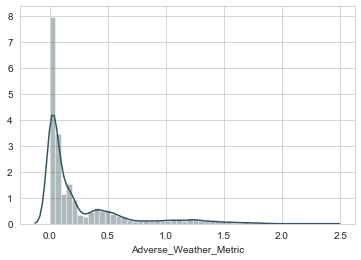

In [52]:
sns.distplot(train['Adverse_Weather_Metric'])

In [53]:
detect_outlier(train,'Adverse_Weather_Metric')

(-0.5009306335006166, 0.8670520124652341)

In [54]:
detect_outlier_map(train,'Adverse_Weather_Metric')

Lower bound: -0.5009306335006166
Upper Bound: 0.8670520124652341
Dataframe Succesfully updated


C:\Users\SHAKYA\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


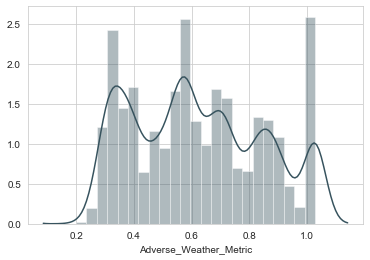

In [55]:
sns.distplot(np.power(train['Adverse_Weather_Metric'],0.2))

In [56]:
train['Adverse_Weather_Metric']=np.power(train['Adverse_Weather_Metric'],0.2)

In [57]:
train.head()

Severity  Safety_Score  \
0                Minor_Damage_And_Injuries     49.223744   
1                Minor_Damage_And_Injuries     62.465753   
2        Significant_Damage_And_Fatalities     63.059361   
3  Significant_Damage_And_Serious_Injuries     48.082192   
4        Significant_Damage_And_Fatalities     26.484018   

   Days_Since_Inspection  Total_Safety_Complaints  Control_Metric  \
0                   14.0                 2.591809     2164.712505   
1                   10.0                 2.591809     2219.830466   
2                   13.0                 4.000000     1903.112900   
3                   11.0                 3.000000     2355.137104   
4                   13.0                 2.519785     1060.235666   

   Turbulence_In_gforces  Cabin_Temperature  Accident_Type_Code  \
0               0.272118              78.04                 2.0   
1               0.423939              84.54                 2.0   
2               0.322604              78.86                 7.0   
3               0.337029              81.79                 3.0   
4               0.541140              77.16                 3.0   

   Max_Elevation  Violations  Adverse_Weather_Metric  Accident_ID  
0   31335.476824         3.0                0.842452       7570.0  
1   26024.711057         2.0                0.811699      12128.0  
2   39269.053927         3.0                0.320161       2181.0  
3   42771.499200         1.0                0.733087       5946.0  
4   35509.228515         2.0                0.707192       9054.0

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
train.columns

Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

In [60]:
col_names=['Control_Metric','Max_Elevation']

In [61]:
features = train[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [62]:
train[col_names]= features


In [63]:
train.head()

Severity  Safety_Score  \
0                Minor_Damage_And_Injuries     49.223744   
1                Minor_Damage_And_Injuries     62.465753   
2        Significant_Damage_And_Fatalities     63.059361   
3  Significant_Damage_And_Serious_Injuries     48.082192   
4        Significant_Damage_And_Fatalities     26.484018   

   Days_Since_Inspection  Total_Safety_Complaints  Control_Metric  \
0                   14.0                 2.591809        0.478157   
1                   10.0                 2.591809        0.572826   
2                   13.0                 4.000000        0.028841   
3                   11.0                 3.000000        0.805225   
4                   13.0                 2.519785       -1.418861   

   Turbulence_In_gforces  Cabin_Temperature  Accident_Type_Code  \
0               0.272118              78.04                 2.0   
1               0.423939              84.54                 2.0   
2               0.322604              78.86                 7.0   
3               0.337029              81.79                 3.0   
4               0.541140              77.16                 3.0   

   Max_Elevation  Violations  Adverse_Weather_Metric  Accident_ID  
0      -0.076142         3.0                0.842452       7570.0  
1      -0.660903         2.0                0.811699      12128.0  
2       0.797411         3.0                0.320161       2181.0  
3       1.183060         1.0                0.733087       5946.0  
4       0.383423         2.0                0.707192       9054.0

In [64]:
X=train.drop(['Severity','Accident_ID'],axis=1)

In [65]:
y=train['Severity']

In [66]:
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, y)
print(model.feature_importances_)

[0.2406511  0.14184316 0.05077406 0.14616862 0.07424983 0.05514127
 0.10448772 0.05272561 0.03848552 0.09547311]


> Test Data

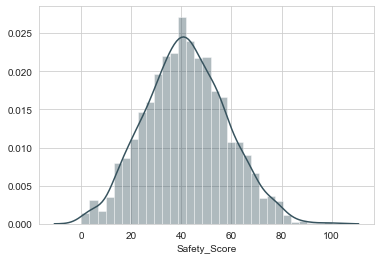

In [67]:
sns.distplot(test.Safety_Score)

In [68]:
detect_outlier(test,'Safety_Score')

(-2.642694063926811, 85.9874429223743)

In [69]:
detect_outlier_map(test,'Safety_Score')

Lower bound: -2.642694063926811
Upper Bound: 85.9874429223743
Dataframe Succesfully updated


C:\Users\SHAKYA\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


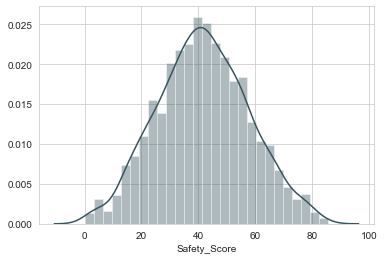

In [70]:
sns.distplot(test.Safety_Score)

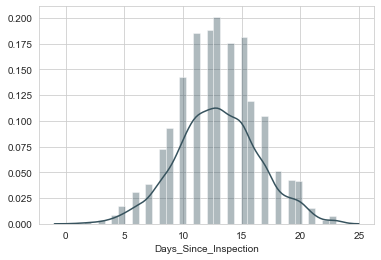

In [71]:
sns.distplot(test['Days_Since_Inspection'])

In [72]:
detect_outlier(test,'Days_Since_Inspection')

(5.0, 21.0)

In [73]:
detect_outlier_map(test,'Days_Since_Inspection')

Lower bound: 5.0
Upper Bound: 21.0
Dataframe Succesfully updated


C:\Users\SHAKYA\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\SHAKYA\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


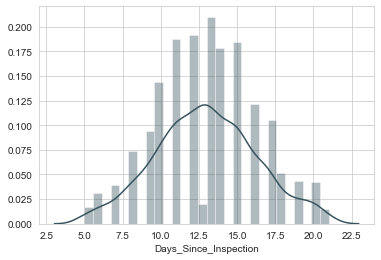

In [74]:
sns.distplot(test['Days_Since_Inspection'])

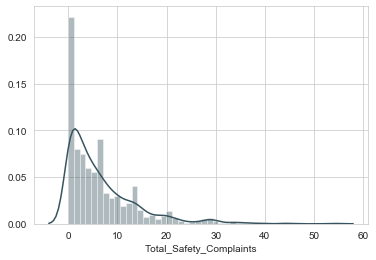

In [75]:
sns.distplot(test['Total_Safety_Complaints'])

In [76]:
detect_outlier(test,'Total_Safety_Complaints')

(-11.0, 21.0)

In [77]:
detect_outlier_map(test,'Total_Safety_Complaints')

Lower bound: -11.0
Upper Bound: 21.0
Dataframe Succesfully updated


C:\Users\SHAKYA\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [78]:
test['Total_Safety_Complaints']=np.power(test['Total_Safety_Complaints'],0.30)

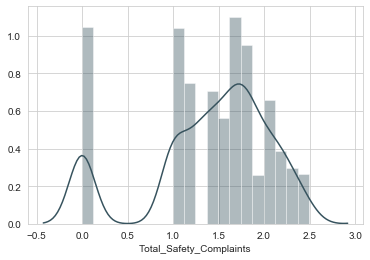

In [79]:
sns.distplot(test['Total_Safety_Complaints'])

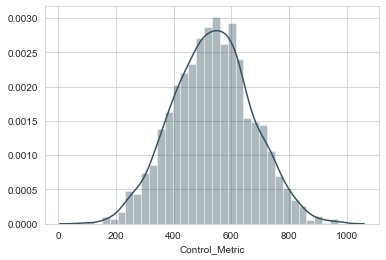

In [80]:
sns.distplot(np.power(test['Control_Metric'],1.5))

In [81]:
detect_outlier(test,'Control_Metric')

(34.57725615314493, 96.24544211485872)

In [82]:
detect_outlier_map(test,'Control_Metric')

Lower bound: 34.57725615314493
Upper Bound: 96.24544211485872
Dataframe Succesfully updated


C:\Users\SHAKYA\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\SHAKYA\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [83]:
test.Control_Metric=np.power(test['Control_Metric'],1.5)

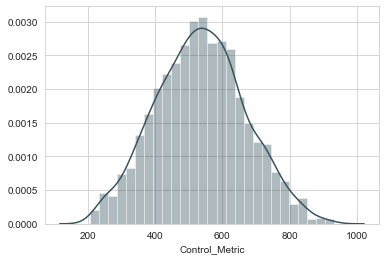

In [84]:
sns.distplot(test['Control_Metric'])

In [85]:
train.columns

Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

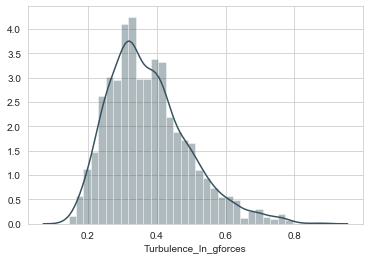

In [86]:
sns.distplot(test['Turbulence_In_gforces'])

In [87]:
detect_outlier(test,'Turbulence_In_gforces')

(0.06890804183195148, 0.6653739632167321)

In [88]:
detect_outlier_map(test,'Turbulence_In_gforces')

Lower bound: 0.06890804183195148
Upper Bound: 0.6653739632167321
Dataframe Succesfully updated


C:\Users\SHAKYA\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [89]:
test.Turbulence_In_gforces=np.power(test['Turbulence_In_gforces'],0.2)

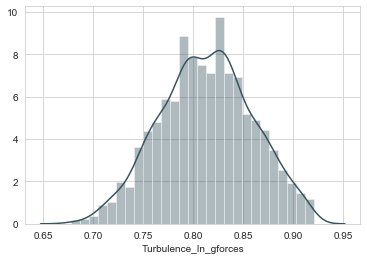

In [90]:
sns.distplot(test['Turbulence_In_gforces'])

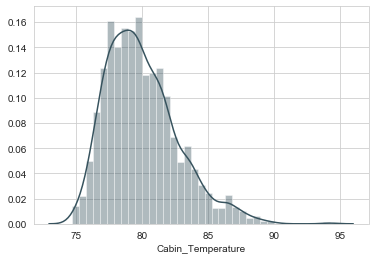

In [91]:
sns.distplot(test['Cabin_Temperature'])

In [92]:
detect_outlier(test,'Cabin_Temperature')

(72.53000000000002, 86.92999999999999)

In [93]:
detect_outlier_map(test,'Cabin_Temperature')

Lower bound: 72.53000000000002
Upper Bound: 86.92999999999999
Dataframe Succesfully updated


C:\Users\SHAKYA\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [94]:
test.Cabin_Temperature=np.power(test['Cabin_Temperature'],0.5)

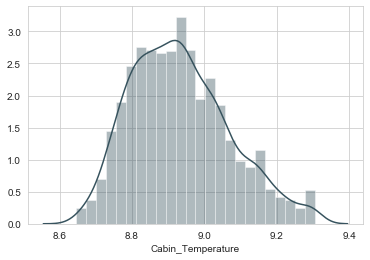

In [95]:
sns.distplot(test['Cabin_Temperature'])

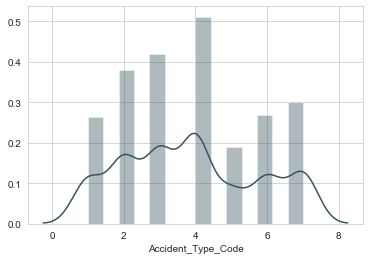

In [96]:
sns.distplot(test['Accident_Type_Code'])

In [97]:
detect_outlier(train,'Accident_Type_Code')
#No outlier present in this Column

(-2.5, 9.5)

In [98]:
train.columns

Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

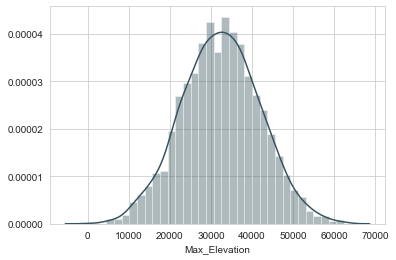

In [99]:
sns.distplot(test['Max_Elevation'])

In [100]:
detect_outlier(test,'Max_Elevation')

(6882.850686636633, 57885.520102140414)

In [101]:
detect_outlier_map(test,'Max_Elevation')

Lower bound: 6882.850686636633
Upper Bound: 57885.520102140414
Dataframe Succesfully updated


C:\Users\SHAKYA\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\SHAKYA\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


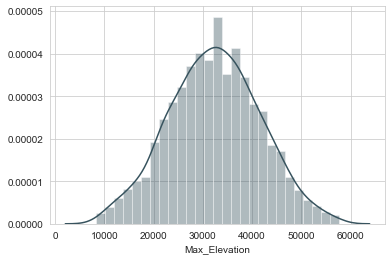

In [102]:
sns.distplot(test['Max_Elevation'])

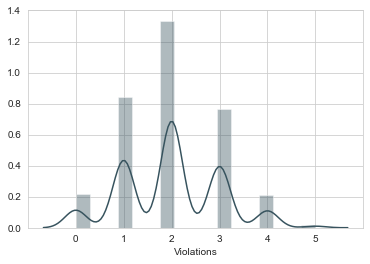

In [103]:
sns.distplot(test['Violations'])

In [104]:
detect_outlier(test,'Violations')

(-2.0, 6.0)

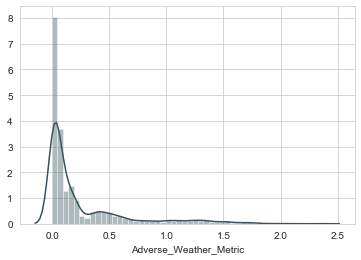

In [105]:
sns.distplot(test['Adverse_Weather_Metric'])

In [106]:
detect_outlier(test,'Adverse_Weather_Metric')

(-0.4402705242792118, 0.7688129782972939)

In [107]:
detect_outlier_map(test,'Adverse_Weather_Metric')

Lower bound: -0.4402705242792118
Upper Bound: 0.7688129782972939
Dataframe Succesfully updated


C:\Users\SHAKYA\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [108]:
test.Adverse_Weather_Metric=np.power(test['Adverse_Weather_Metric'],0.25)

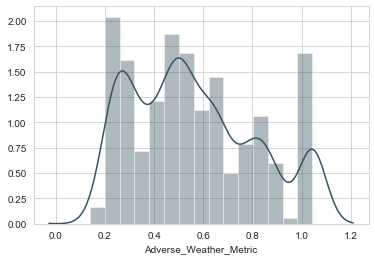

In [109]:
sns.distplot(test['Adverse_Weather_Metric'])

In [110]:
test.head()

Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
0     19.497717                   16.0                 1.711770   
1     58.173516                   15.0                 1.390389   
2     33.287671                   15.0                 1.390389   
3      3.287671                   21.0                 1.620657   
4     10.867580                   18.0                 1.231144   

   Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
0      612.867282               0.827905           8.849859   
1      519.038820               0.758367           8.865664   
2      520.688015               0.804342           8.958233   
3      540.613800               0.841426           8.992219   
4      420.273633               0.792816           8.900562   

   Accident_Type_Code  Max_Elevation  Violations  Adverse_Weather_Metric  \
0                 4.0   37949.724386         2.0                0.513803   
1                 7.0   30194.805567         2.0                0.229567   
2                 6.0   17572.925484         1.0                0.256319   
3                 3.0   40209.186341         2.0                0.668732   
4                 2.0   35495.525408         2.0                0.833956   

   Accident_ID  
0          1.0  
1         10.0  
2         14.0  
3         17.0  
4         21.0

In [111]:
col_names

['Control_Metric', 'Max_Elevation']

In [112]:
features = test[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [113]:
test[col_names]= features


In [114]:
test.head()

Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
0     19.497717                   16.0                 1.711770   
1     58.173516                   15.0                 1.390389   
2     33.287671                   15.0                 1.390389   
3      3.287671                   21.0                 1.620657   
4     10.867580                   18.0                 1.231144   

   Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
0        0.579843               0.827905           8.849859   
1       -0.126123               0.758367           8.865664   
2       -0.113714               0.804342           8.958233   
3        0.036207               0.841426           8.992219   
4       -0.869233               0.792816           8.900562   

   Accident_Type_Code  Max_Elevation  Violations  Adverse_Weather_Metric  \
0                 4.0       0.601619         2.0                0.513803   
1                 7.0      -0.237976         2.0                0.229567   
2                 6.0      -1.604497         1.0                0.256319   
3                 3.0       0.846242         2.0                0.668732   
4                 2.0       0.335912         2.0                0.833956   

   Accident_ID  
0          1.0  
1         10.0  
2         14.0  
3         17.0  
4         21.0

In [115]:
test1=test.drop(['Accident_ID'],1)

In [116]:
test.head()

Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
0     19.497717                   16.0                 1.711770   
1     58.173516                   15.0                 1.390389   
2     33.287671                   15.0                 1.390389   
3      3.287671                   21.0                 1.620657   
4     10.867580                   18.0                 1.231144   

   Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
0        0.579843               0.827905           8.849859   
1       -0.126123               0.758367           8.865664   
2       -0.113714               0.804342           8.958233   
3        0.036207               0.841426           8.992219   
4       -0.869233               0.792816           8.900562   

   Accident_Type_Code  Max_Elevation  Violations  Adverse_Weather_Metric  \
0                 4.0       0.601619         2.0                0.513803   
1                 7.0      -0.237976         2.0                0.229567   
2                 6.0      -1.604497         1.0                0.256319   
3                 3.0       0.846242         2.0                0.668732   
4                 2.0       0.335912         2.0                0.833956   

   Accident_ID  
0          1.0  
1         10.0  
2         14.0  
3         17.0  
4         21.0

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [119]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [120]:
dt_pre=dt_model.predict(X_test)

In [121]:
from sklearn import metrics
metrics.accuracy_score(dt_pre,y_test)

0.918

In [122]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,dt_pre))

                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.90      0.94      0.92       313
              Minor_Damage_And_Injuries       0.90      0.89      0.89       237
      Significant_Damage_And_Fatalities       0.95      0.88      0.91       168
Significant_Damage_And_Serious_Injuries       0.93      0.94      0.94       282

                               accuracy                           0.92      1000
                              macro avg       0.92      0.91      0.92      1000
                           weighted avg       0.92      0.92      0.92      1000



In [123]:
param_grid={'max_depth': list(range(3, 15)),'criterion':['gini','entropy'],'min_samples_leaf':[2,3,5,6,8],'min_samples_split':[2,4,6,7,8,10]}

In [124]:
from sklearn.model_selection import RandomizedSearchCV

In [125]:
dtcv=RandomizedSearchCV(dt_model,param_grid,n_jobs=-1,n_iter=80,cv=10)

In [126]:
dtcv.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best'

In [127]:
dtcv.best_params_

{'min_samples_split': 8,
 'min_samples_leaf': 2,
 'max_depth': 10,
 'criterion': 'entropy'}

In [128]:
dtcv.best_score_

0.9265555555555556

In [129]:
dt_model=DecisionTreeClassifier(min_samples_split=8,
 min_samples_leaf= 3,
 max_leaf_nodes=550,
 max_depth=11,
 criterion= 'entropy')

In [130]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=11,
                       max_features=None, max_leaf_nodes=550,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [131]:
dtc_pre=dt_model.predict(X_test)
metrics.accuracy_score(dtc_pre,y_test)

0.933

In [132]:
print(classification_report(y_test,dtc_pre))

                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.93      0.95      0.94       313
              Minor_Damage_And_Injuries       0.93      0.92      0.92       237
      Significant_Damage_And_Fatalities       0.94      0.93      0.93       168
Significant_Damage_And_Serious_Injuries       0.94      0.93      0.94       282

                               accuracy                           0.93      1000
                              macro avg       0.93      0.93      0.93      1000
                           weighted avg       0.93      0.93      0.93      1000



In [133]:
from sklearn.ensemble import RandomForestClassifier

In [134]:
Ran_model=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)

In [135]:
Ran_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [136]:
ran_pre=Ran_model.predict(X_test)

In [137]:
metrics.accuracy_score(ran_pre,y_test)

0.888

In [138]:
print(classification_report(y_test,ran_pre))

                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.91      0.89      0.90       313
              Minor_Damage_And_Injuries       0.83      0.87      0.85       237
      Significant_Damage_And_Fatalities       0.88      0.86      0.87       168
Significant_Damage_And_Serious_Injuries       0.91      0.91      0.91       282

                               accuracy                           0.89      1000
                              macro avg       0.89      0.88      0.88      1000
                           weighted avg       0.89      0.89      0.89      1000



In [139]:
ran_grid={'n_estimators':[500],
          'criterion':['gini','entropy'],
          'max_depth':[5, 8, 15, 25, 30],
          'min_samples_leaf':[10,50,100,200,500],
         'min_samples_split':[2,5,10,15,100],
         'max_features':np.arange(5,10),
         'bootstrap':[True,False]}

In [140]:
rscv=RandomizedSearchCV(Ran_model,ran_grid,n_jobs=-1,n_iter=40,cv=9)

In [141]:
rscv.fit(X_train,y_train)

RandomizedSearchCV(cv=9, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='entropy',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=10,
                                                    n_jobs=None,

In [142]:
rscv.best_params_

{'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 10,
 'max_features': 6,
 'max_depth': 25,
 'criterion': 'entropy',
 'bootstrap': False}

In [143]:
rscv.best_score_

0.93

In [144]:
Ran_model=RandomForestClassifier(n_estimators=450,criterion='entropy',random_state=0,min_samples_split=2,
                                min_samples_leaf=1,max_depth=25,bootstrap=False)

In [145]:
Ran_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=25, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=450,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [146]:
rfc_pre=Ran_model.predict(X_test)

In [147]:
metrics.accuracy_score(rfc_pre,y_test)

0.951

In [148]:
print(classification_report(y_test,rfc_pre))

                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.95      0.95      0.95       313
              Minor_Damage_And_Injuries       0.95      0.94      0.94       237
      Significant_Damage_And_Fatalities       0.94      0.95      0.94       168
Significant_Damage_And_Serious_Injuries       0.96      0.96      0.96       282

                               accuracy                           0.95      1000
                              macro avg       0.95      0.95      0.95      1000
                           weighted avg       0.95      0.95      0.95      1000



In [149]:
rfc_test_pred=Ran_model.predict(test1)

In [150]:
pd.DataFrame({'Accident_ID':test.Accident_ID,'Severity':rfc_test_pred}).set_index('Accident_ID').to_csv('rfc111.csv')

In [151]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
xgb1=XGBClassifier()

In [152]:
xgb1.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [153]:
xgb_pred=xgb1.predict(X_test)

In [154]:
metrics.accuracy_score(xgb_pred,y_test)

0.829

In [155]:
optimization_dict = {'max_depth': [2,4,6,10],
                     'n_estimators': [50,100,200,300,1000,3000],
                    'learning_rate':[0.001,0.01,0.05,0.1],
                    'gamma':[0,0.1,0.5,1]}

In [156]:
xgbsearch=RandomizedSearchCV(xgb1,optimization_dict,n_jobs=-1,n_iter=80,cv=10)

In [157]:
xgbsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='multi:softprob',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
          

In [158]:
xgbsearch.best_params_

{'n_estimators': 3000, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 0.1}

In [159]:
xgbsearch.best_score_

0.9512222222222222

In [160]:
xgb=XGBClassifier(gamma=0.1,learning_rate=0.1,max_depth=6,n_estimators=1050)

In [161]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=1050, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [162]:
xgb_pre=xgb.predict(X_test)

In [163]:
metrics.accuracy_score(xgb_pre,y_test)

0.957

In [164]:
xgb_pre_test=xgb.predict(test1)

In [165]:
pd.DataFrame({'Accident_ID':test.Accident_ID,'Severity':xgb_pre_test}).set_index('Accident_ID').to_csv('xgb222.csv')